# Labeled Dataset Generation
## STEP 1
* Determine Likely Legitimate Providers
    * MIPS Data
    * Random sample
* Load Fraudulent NPI
* Create labeled dataset

In [1]:
# Import Pyhon libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

DATA_FOLDER = r"Datasets/"
os.chdir(DATA_FOLDER)
os.getcwd()

'C:\\Users\\theru\\DATA606\\Datasets'

In [2]:
# Load MIPS Data
df_mips = pd.read_csv('Physician_Compare_2017_Individual_EC_Public_Reporting_-_Overall_MIPS_Performance.csv')
df_mips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376170 entries, 0 to 376169
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NPI                     376170 non-null  int64  
 1   PAC ID                  376170 non-null  int64  
 2   Last Name               376161 non-null  object 
 3   First Name              376163 non-null  object 
 4   Source of scores        376170 non-null  object 
 5   Quality Category Score  372854 non-null  float64
 6   ACI Category Score      312336 non-null  float64
 7   IA Category Score       376170 non-null  float64
 8   Final MIPS Score        376170 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.8+ MB


In [3]:
df_mips.sample(5)

,NPI,PAC ID,Last Name,First Name,Source of scores,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
292403,1770712309,3971745464,WALLACE,GREGORY,individual,100.0,NaN,40.0,100.0
75165,1194974824,8921280470,TANCEVSKI,ALEKSANDAR,individual,98.5,99.0,40.0,98.8
321976,1851407662,9739284308,LEE,LAURA,group,76.3,100.0,40.0,85.8
163875,1437226594,5698818698,BARTON,MARY,targeted review,100.0,98.3,40.0,99.5
273398,1720171143,648259929,DOUST,MATTHEW,targeted review,91.5,66.7,40.0,85.8


In [4]:
df_mips = df_mips.rename(columns={'NPI': 'npi'})
df_mips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376170 entries, 0 to 376169
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   npi                     376170 non-null  int64  
 1   PAC ID                  376170 non-null  int64  
 2   Last Name               376161 non-null  object 
 3   First Name              376163 non-null  object 
 4   Source of scores        376170 non-null  object 
 5   Quality Category Score  372854 non-null  float64
 6   ACI Category Score      312336 non-null  float64
 7   IA Category Score       376170 non-null  float64
 8   Final MIPS Score        376170 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.8+ MB


In [5]:
df_Target_new = pd.DataFrame()
df_Target_new = df_mips.loc[(df_mips['Final MIPS Score'] == 100)]
df_Target_new.shape

(66650, 9)

In [6]:
# Load opioid provider data
df_opioid_provider = pd.read_csv('../opioid_provider.csv')
df_opioid_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704463 entries, 0 to 704462
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   npi                               704463 non-null  int64  
 1   nppes_provider_last_org_name      704447 non-null  object 
 2   nppes_provider_first_name         704213 non-null  object 
 3   nppes_provider_gender             704223 non-null  object 
 4   nppes_provider_street1            704461 non-null  object 
 5   nppes_provider_street2            283627 non-null  object 
 6   nppes_provider_city               704463 non-null  object 
 7   nppes_provider_state              704463 non-null  object 
 8   nppes_provider_zip5               704426 non-null  float64
 9   nppes_provider_zip4               628928 non-null  float64
 10  specialty_description             704463 non-null  object 
 11  medicare_prvdr_enroll_status      704462 non-null  o

In [7]:
df_opioid_provider.sample(10)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
36315,1063408896,VOGEL,ROBERT,M,1407 W ILLINOIS AVE,NaN,MIDLAND,TX,79701.0,6536.0,...,339.60,665.20,54.5,NaN,109.600000,0.0,NaN,515.20,331.40,1.590620
218887,1366461048,CAHILL,WILLIAM,M,50 LECH WALESA,NaN,SAN FRANCISCO,CA,94102.0,4506.0,...,28.50,38.00,NaN,14.0,NaN,0.0,NaN,39.50,24.50,2.119000
74488,1124089420,BEASLEY,JOHN,M,100 N NINE MOUNDS RD,NaN,VERONA,WI,53593.0,NaN,...,118.00,230.00,12.5,NaN,0.000000,0.0,NaN,155.00,87.00,1.314540
32565,1053394205,FELDMAN,ROBERT,M,6141 SUNSET DR,SUITE 401,SOUTH MIAMI,FL,33143.0,5039.0,...,NaN,40.00,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.842867
3801,1003871856,CRAIN,THOMAS,M,164 SUMMIT AVE,NaN,PROVIDENCE,RI,2906.0,2853.0,...,120.50,215.00,NaN,NaN,19.500000,0.0,NaN,193.50,56.50,1.459200
252616,1417975558,ARDUINO,ROBERTO,M,2015 THOMAS ST,NaN,HOUSTON,TX,77009.0,8044.0,...,67.40,NaN,NaN,0.0,55.200000,0.0,0.0,35.20,53.80,1.498100
108623,1184050544,TRIPORO,PETER,M,4880 BOAT CLUB RD,SUITE 120,FORT WORTH,TX,76135.0,7030.0,...,47.00,83.25,58.5,0.0,NaN,0.0,0.0,81.25,51.50,1.776200
108186,1174858104,GUZMAN,PEDRO,M,20 N. LAUREL ST.,NaN,HAZLETON,PA,18201.0,5948.0,...,119.25,NaN,0.0,0.0,301.333333,0.0,NaN,25.00,258.75,1.130950
25016,1043234370,SALMON,JOHN,M,101 E WT HARRIS BLVD,"BLDG 1000, SUITE 1214(2ND FLOOR)",CHARLOTTE,NC,28262.0,3485.0,...,61.80,69.00,81.0,NaN,NaN,0.0,0.0,99.40,42.80,2.355660
559855,1922365436,AUSTIN,COLBY,M,3181 SW SAM JACKSON PARK RD,NaN,PORTLAND,OR,97239.0,3011.0,...,30.00,117.50,0.0,0.0,NaN,0.0,0.0,47.50,47.50,1.549840


In [8]:
# Create NPI listing for opioid provider dataframe
df_opioid_npi = pd.DataFrame()
df_opioid_npi['npi'] = df_opioid_provider['npi']
df_opioid_npi

,npi
0,1003000126
1,1003000142
2,1003000167
3,1003000282
4,1003000407
...,...
704458,1992767495
704459,1992906382
704460,1992930499
704461,1992939748


In [9]:
# Merge Opioid NPI listing with MIPS NPI listing
df_merged = pd.merge(df_opioid_npi, df_mips, how="inner", on="npi")
df_merged.info()
df_merged.sample(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228234 entries, 0 to 228233
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   npi                     228234 non-null  int64  
 1   PAC ID                  228234 non-null  int64  
 2   Last Name               228230 non-null  object 
 3   First Name              228230 non-null  object 
 4   Source of scores        228234 non-null  object 
 5   Quality Category Score  225143 non-null  float64
 6   ACI Category Score      205828 non-null  float64
 7   IA Category Score       228234 non-null  float64
 8   Final MIPS Score        228234 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 17.4+ MB


,npi,PAC ID,Last Name,First Name,Source of scores,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
73453,1336213677,345435178,GALPERIN,MIKHAIL,group,0.0,0.0,0.0,0.0
162291,1740254473,5092703694,SHTIVELBAND,MIKHAIL,apm,NaN,71.6,40.0,78.7
86325,1396774782,4284524760,DAVIS,BRETT,individual,81.5,71.0,40.0,81.7
72873,1336147958,8022089895,SILVERMAN,MARK,group,100.0,90.0,40.0,97.5
5031,1023052511,446386205,CHANDLER,DAVID,individual,86.7,NaN,40.0,88.7
156471,1710930516,9436118890,BOGARD,ANN,individual,33.3,0.0,0.0,20.0
70118,1326005703,6103727599,DOOLEY,JOHN,individual,16.7,0.0,0.0,10.0
43111,1194815050,2961530118,NASH,RICHARD,individual,5.0,0.0,0.0,3.0
154936,1700959871,5395827547,QUINN,ROBERT,individual,100.0,100.0,40.0,100.0
221809,1699026195,9537477450,SIDDIQUI,JAMIL MANZAR,individual,47.4,NaN,0.0,40.3


Text(0, 0.5, 'Number of Opioid Providers')

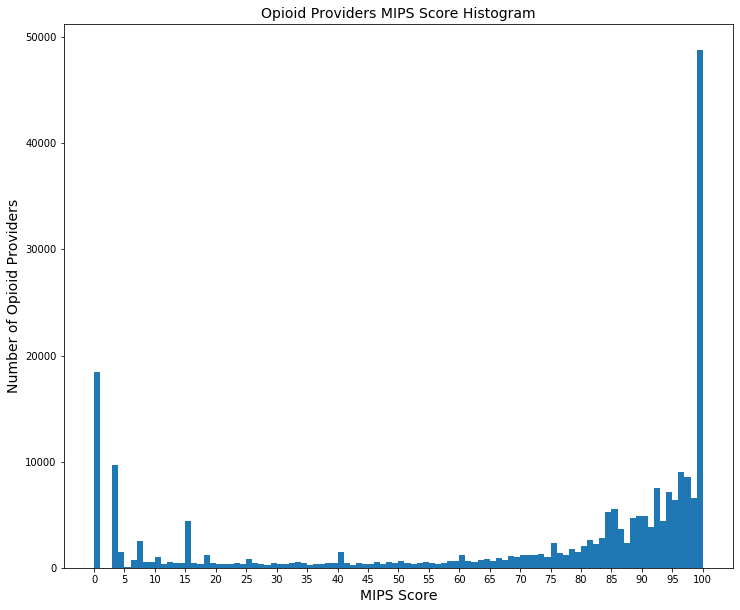

In [30]:
# Histogram of opioid providers with MIPS scores
fig, ax = plt.subplots(figsize=(12,10))
ax.hist(df_merged['Final MIPS Score'], bins=100)
ax.set_xticks(range(0,101,5))
ax.set_title('Opioid Providers MIPS Score Histogram', fontsize=14)
ax.set_xlabel('MIPS Score', fontsize=14)
ax.set_ylabel('Number of Opioid Providers', fontsize=14)

In [11]:
# Create dataframe of opioid NPIs with perfect MIPS score (100) 
df_combined_target = pd.DataFrame()
df_combined_target = df_merged.loc[(df_merged['Final MIPS Score'] == 100)].copy()
df_combined_target.shape

(38229, 9)

In [12]:
df_combined_target['npi'].sample(10)

181654    1831139401
13519     1063423895
133629    1619086493
65790     1306032446
45305     1205879194
225099    1568761021
104631    1477809952
169521    1770663536
56459     1255541488
209648    1952678286
Name: npi, dtype: int64

In [13]:
# Create dataframe for legitimate providers
df_legit = pd.DataFrame()
df_legit['npi'] = df_combined_target['npi']
df_legit.sample(10)

,npi
19941,1093708588
132981,1609941186
224640,1427203819
194684,1891710190
168540,1770537714
172825,1790714368
26002,1114988409
37361,1174512735
210834,1962493445
90009,1417111527


In [14]:
# Set classifiers for legitimate providers
df_legit['provider_classification'] = 0   # Provider Classification of ZERO (0) means Likely Legitimate
df_legit['certainty'] = 1                 # Certainty Level of ONE (1) means known / assumed 
df_legit.sample(10)

,npi,provider_classification,certainty
31712,1144295916,0,1
47687,1215955588,0,1
32837,1154310209,0,1
192845,1881656411,0,1
176343,1801893755,0,1
27938,1124253877,0,1
148219,1679708754,0,1
6937,1033119136,0,1
148694,1679890552,0,1
180184,1821094707,0,1


In [15]:
# Load fraudulent provider data 
df_fraudulent_provider = pd.read_csv('../fraudulent_npi.csv')
df_fraudulent_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   npi                 301 non-null    int64 
 1   press_release_date  301 non-null    object
 2   press_release_url   301 non-null    object
 3   include             301 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 7.5+ KB


In [16]:
df_fraudulent_provider.sample(5)

,npi,press_release_date,press_release_url,include
300,1174919948,2016-04-12T00:00:00-04:00,https://www.justice.gov/opa/pr/unlicensed-phys...,True
159,1376616565,2019-08-28T00:00:00-04:00,https://www.justice.gov/opa/pr/charges-filed-a...,True
179,1811476120,2019-04-17T00:00:00-04:00,https://www.justice.gov/opa/pr/appalachian-reg...,False
226,1801268131,2018-10-25T00:00:00-04:00,https://www.justice.gov/opa/pr/justice-departm...,False
188,1881660926,2019-03-13T00:00:00-04:00,https://www.justice.gov/opa/pr/philadelphia-ar...,True


In [17]:
# Create dataframe with fraudulent NPIs to mark in labeled dataset
df_keepers = df_fraudulent_provider.loc[(df_fraudulent_provider['include'] == True)].copy()
df_keepers.shape

(221, 4)

In [18]:
df_keepers.sample(5)

,npi,press_release_date,press_release_url,include
96,1467524637,2019-09-24T00:00:00-04:00,https://www.justice.gov/opa/pr/second-appalach...,True
65,1295203727,2019-09-26T00:00:00-04:00,https://www.justice.gov/opa/pr/federal-health-...,True
112,1346560026,2019-09-18T00:00:00-04:00,https://www.justice.gov/opa/pr/texas-health-ca...,True
77,1194079012,2019-09-26T00:00:00-04:00,https://www.justice.gov/opa/pr/federal-health-...,True
110,1902149800,2019-09-24T00:00:00-04:00,https://www.justice.gov/opa/pr/second-appalach...,True


In [19]:
# Set classifiers for fraudulent providers
df_keepers['provider_classification'] = 1   # Provider Classification of ONE (1) means fraudulent
df_keepers['certainty'] = 1                   # Certainty Level of ONE (1) means known / assumed 
df_keepers

,npi,press_release_date,press_release_url,include,provider_classification,certainty
0,1912929787,2020-02-26T00:00:00-05:00,https://www.justice.gov/opa/pr/tennessee-podia...,True,1,1
1,1679623375,2020-02-21T00:00:00-05:00,https://www.justice.gov/opa/pr/west-tennessee-...,True,1,1
2,1427511252,2020-02-21T00:00:00-05:00,https://www.justice.gov/opa/pr/west-tennessee-...,True,1,1
3,1518352590,2020-02-21T00:00:00-05:00,https://www.justice.gov/opa/pr/ohio-doctor-ple...,True,1,1
4,1013082890,2020-02-21T00:00:00-05:00,https://www.justice.gov/opa/pr/ohio-doctor-ple...,True,1,1
...,...,...,...,...,...,...
280,1962552331,2017-01-17T00:00:00-05:00,https://www.justice.gov/opa/pr/mckesson-agrees...,True,1,1
297,1891743654,2016-09-23T00:00:00-04:00,https://www.justice.gov/opa/pr/alabama-pill-mi...,True,1,1
298,1699748228,2016-05-12T00:00:00-04:00,https://www.justice.gov/opa/pr/kentucky-anesth...,True,1,1
299,1598729618,2016-05-12T00:00:00-04:00,https://www.justice.gov/opa/pr/kentucky-anesth...,True,1,1


In [20]:
# Create dataframe of only labeled providers
df_labeled_only = pd.DataFrame()
df_labeled_only = df_legit.copy()
df_labeled_only

,npi,provider_classification,certainty
5,1003001371,0,1
16,1003003609,0,1
24,1003006552,0,1
28,1003007980,0,1
31,1003008590,0,1
...,...,...,...
228144,1669733739,0,1
228173,1770741977,0,1
228190,1831548478,0,1
228203,1861773418,0,1


In [21]:
# Add fraudulent labeled to legit labeled
df_labeled_only = df_labeled_only.append(
    df_keepers[['npi', 'provider_classification', 'certainty']]
)

df_labeled_only

,npi,provider_classification,certainty
5,1003001371,0,1
16,1003003609,0,1
24,1003006552,0,1
28,1003007980,0,1
31,1003008590,0,1
...,...,...,...
280,1962552331,1,1
297,1891743654,1,1
298,1699748228,1,1
299,1598729618,1,1


In [22]:
# Ensure all labeled NPIs are unique in final dataframe
df_check = df_labeled_only[[
    'npi', 
    'provider_classification'
]].groupby(['npi']).count().reset_index()

df_check.sort_values(['npi'], ascending=False, inplace=True)
df_check.info()
df_check.head(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38450 entries, 38449 to 0
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   npi                      38450 non-null  int64
 1   provider_classification  38450 non-null  int64
dtypes: int64(2)
memory usage: 901.2 KB


,npi,provider_classification
38449,1992999825,1
38448,1992997399,1
38447,1992993760,1
38446,1992993638,1
38445,1992992655,1
38444,1992991921,1
38443,1992990667,1
38442,1992988257,1
38441,1992987713,1
38440,1992986897,1


In [23]:
# Create fully labeled dataset
df_opioid_labeled = pd.DataFrame()
df_opioid_labeled = pd.merge(df_opioid_provider, df_labeled_only, how="left", on="npi")
df_opioid_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704463 entries, 0 to 704462
Data columns (total 71 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   npi                               704463 non-null  int64  
 1   nppes_provider_last_org_name      704447 non-null  object 
 2   nppes_provider_first_name         704213 non-null  object 
 3   nppes_provider_gender             704223 non-null  object 
 4   nppes_provider_street1            704461 non-null  object 
 5   nppes_provider_street2            283627 non-null  object 
 6   nppes_provider_city               704463 non-null  object 
 7   nppes_provider_state              704463 non-null  object 
 8   nppes_provider_zip5               704426 non-null  float64
 9   nppes_provider_zip4               628928 non-null  float64
 10  specialty_description             704463 non-null  object 
 11  medicare_prvdr_enroll_status      704462 non-null  o

In [48]:
# Output file with fraudulent NPIs
df_opioid_labeled.to_csv('../labeled_opioid_providers.csv', index=False)

In [50]:
df_opioid_labeled.sample(25)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_state,nppes_provider_zip5,nppes_provider_zip4,...,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,provider_classification,certainty
88251,1144393018,MILLER,RONALD,M,843 REED ST,NaN,AMERICAN FALLS,ID,83211.0,1336.0,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.039500,NaN,NaN
532040,1881664241,KLUTMAN,RONALD,M,4214 38TH ST,NaN,COLUMBUS,NE,68601.0,1616.0,...,0.0,0.0,NaN,0.0,NaN,206.000000,72.000000,1.072800,NaN,NaN
257732,1427249788,YUREK,BRYAN,M,230 MCKEE PL,SUITE 500,PITTSBURGH,PA,15213.0,3903.0,...,NaN,0.0,0.0,0.0,0.0,135.800000,113.200000,1.588840,0.0,1.0
293898,1487818977,BICE,ELEANOR,F,9507 HOSPITAL AVE.,NaN,NASSAWADOX,VA,23413.0,NaN,...,NaN,0.0,NaN,0.0,0.0,64.000000,22.000000,1.956200,NaN,NaN
496653,1821100835,GROSSLIGHT,SUSAN,F,880 W MOULTRIE ST,SUITE 200,WINNSBORO,SC,29180.0,2411.0,...,NaN,NaN,0.0,0.0,NaN,152.000000,126.800000,1.344020,NaN,NaN
44509,1073589834,SANDERSON,PAULA,F,1202 21ST AVE,NaN,ROCK VALLEY,IA,51247.0,1420.0,...,NaN,0.0,0.0,0.0,NaN,151.000000,52.333333,1.145333,NaN,NaN
130204,1215902382,LUTSIC,RONALD,M,6255 INKSTER RD,NaN,GARDEN CITY,MI,48135.0,2577.0,...,NaN,0.0,NaN,0.0,0.0,39.000000,12.000000,1.900300,NaN,NaN
76701,1124252887,CAMPBELL,CARMEN,F,UW HOSPITAL AND CLINICS,"600 HIGHLAND AVE, H4/831",MADISON,WI,53792.0,1.0,...,33.0,NaN,NaN,0.0,0.0,75.500000,35.500000,1.503150,NaN,NaN
35735,1053670729,WEIGANDT,JULIE,F,4502 MEDICAL DR,NaN,SAN ANTONIO,TX,78229.0,4402.0,...,NaN,0.0,24.0,0.0,0.0,17.000000,21.000000,2.057200,NaN,NaN
646999,1275826844,BUTLER,MARY,F,755 N 11TH ST,STE P2280,BEAUMONT,TX,77702.0,1525.0,...,NaN,0.0,NaN,NaN,0.0,112.333333,62.333333,1.812400,NaN,NaN
